# Data and models models
***

In this notebook, the different data that were calculated previously (DSSP, sequence and molecule data) are imported and then combined into a single Pandas DataFrame, and a label DataFrame is also made. The data is then split into training and testing sets, and the machine learning models are trained afterwards.

**Contents**

1. [Importing the data](#Importing-the-data)
    1. [The label](#The-label)
1. [Combining the data](#Combining-the-data)
1. [Exploring the data and splitting into train and test sets](#Exploring-the-data-and-splitting-into-train-and-test-sets)
    1. [Correlation between descriptors and the label](#Correlation-between-descriptors-and-the-label)
    1. [Splitting the data](#Splitting-the-data)
        1. [Stratified split](#Stratified-split)
        1. [Making the train and test sets](#Making-the-train-and-test-sets)
1. [Training models](#Training-models)
    1. [Linear Regression](#Linear-Regression)
        1. RMSE
        1. Cross validation
        1. Plot
    1. [Random Forest](#Random-Forest])
        1. RMSE
        1. Cross validation
        1. Plot
    1. [Decision tree](#Decision-tree)
        1. RMSE
        1. Cross validation
        1. Plot
    1. [SVM](#SVM-(Support-Vector-Machine))
        1. RMSE
        1. Cross validation
        1. Plot
        1. SVR with 'poly' kernel
    1. [MLP](#MLP-(Multi-layer-perceptron))
        1. RMSE
        1. Cross validation
        1. Plot
    
## Importing the data

In [1]:
import pandas as pd

# importing DSSP and molecular descriptors, the protein 
# descriptors from sequence still need to be calculated
dssp = pd.read_csv("C:\\Users\\Ieremita Emanuel\\Desktop\\CS_project\\CSVs\\dssp_df.csv")
molecules = pd.read_csv("C:\\Users\\Ieremita Emanuel\\Desktop\\CS_project\\CSVs\\molecules.csv")

The following function will automatically compute the descriptors for all the proteins in the dataset and return a dictionary that will be converted to a Pandas DataFrame.

In [2]:
# importing the sequence data
seq_data = pd.read_csv("C:\\Users\\Ieremita Emanuel\\Desktop\\CS_project\\CSVs\\sequences.csv")

In [3]:
import nbimporter
# importing the Protein_descriptors notebook to access
# the functions within it
import Protein_descriptors as prot



def calc_prot_descriptors(sequences_df):
    '''Calculates the descriptors for entries in the sequences DataFrame'''
    
    entries = []
    for i in sequences_df.index:
        
        # getting the sequence and number of chains for the ID in the DataFrame
        sequence = sequences_df.loc[i, 'sequence']
        chains = sequences_df.loc[i, 'n_chains']
        
        # dictionary with protein descriptors from the custom functions
        prot_desc_1 = {'prot_MW': prot.prot_MW(sequence), 
                        'tot_aa_SASA': prot.tot_aa_SASA(sequence), 
                        'tot_VWvol': prot.tot_VWvol(sequence)}
        
        # rest of dictionaries with percentage and surface polarity values
        aa_percentages = prot.percent_aa(sequence)
        more_percentages = prot.percents(sequence)
        surface_polarity = prot.pol_SA(sequence)
        
        # final dictionary with columns in order 
        custom_prot_desc = {**prot_desc_1, 
                            **aa_percentages, 
                            **more_percentages, 
                            'tot_aa_TPSA': prot.tot_aa_TPSA(sequence), 
                            **surface_polarity, 
                            'tot_SASA/actual_asa': round(prot_desc_1['tot_aa_SASA']/dssp.loc[i, 'asa'], 3), 
                            'length': len(sequence), 
                            'n_chains': chains, 
                            'aa/chain': round(len(sequence)/chains, 3)}

        entries.append(custom_prot_desc)
    
    return pd.DataFrame(entries)

In [4]:
sequences = calc_prot_descriptors(seq_data)

In [5]:
sequences

,prot_MW,tot_aa_SASA,tot_VWvol,%A,%R,%N,%D,%C,%E,%Q,...,tot_aa_TPSA,apolar_SA,pol_unch_SA,pol_ch_SA,pol_ch_basic_SA,pol_ch_acid_SA,tot_SASA/actual_asa,length,n_chains,aa/chain
0,53.94,110189.12,43700,7.18,3.83,3.83,6.22,1.91,4.78,6.22,...,32884.0,41266.82,22381.80,26222.50,13814.16,12408.34,6.191,418,2,209.0
1,54.24,110772.16,43948,7.14,3.81,3.81,6.19,1.90,4.76,6.19,...,33061.2,41849.86,22381.80,26222.50,13814.16,12408.34,6.176,420,2,210.0
2,52.09,107612.08,42358,8.67,3.86,2.65,5.06,1.45,5.78,2.17,...,32450.2,41809.39,17754.67,32694.57,20436.06,12258.51,5.922,415,1,415.0
3,21.50,43769.34,17467,10.37,7.93,7.32,6.10,0.00,4.88,3.05,...,13612.6,14879.18,8812.79,13459.26,8599.12,4860.14,4.969,164,1,164.0
4,21.50,43769.34,17467,10.37,7.93,7.32,6.10,0.00,4.88,3.05,...,13612.6,14879.18,8812.79,13459.26,8599.12,4860.14,4.988,164,1,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9602,39.92,80881.27,31926,6.84,3.58,5.54,3.91,0.65,4.56,3.58,...,24551.8,23766.30,21522.28,17651.10,10564.80,7086.30,6.795,307,1,307.0
9603,112.31,226918.61,91056,7.48,7.48,5.46,5.82,1.07,7.72,3.56,...,69073.3,78935.30,37956.06,73264.97,42096.51,31168.46,6.955,842,1,842.0
9604,20.41,41215.87,16069,7.64,5.73,4.46,9.55,0.00,5.10,5.10,...,12831.8,11999.08,8535.30,12388.88,6238.79,6150.09,5.035,157,1,157.0
9605,25.17,51788.02,20768,3.03,4.04,4.04,4.04,2.02,4.04,6.06,...,15243.4,22038.72,10378.60,11251.24,6907.08,4344.16,5.027,198,2,99.0


### The label

In [6]:
label = pd.read_csv("C:\\Users\\Ieremita Emanuel\\Desktop\\CS_project\\CSVs\\affinities.csv")

In [7]:
label

,ID,-logKd/Ki,Kd/Ki,ligand_name
0,10gs,6.40,Ki=0.4uM,(VWW)
1,13gs,4.62,Ki=24uM,(SAS)
2,16pk,5.22,Ki=6uM,(BIS)
3,184l,4.72,Kd=19uM,(I4B)
4,185l,3.54,Kd=290uM,(IND)
...,...,...,...,...
9602,8cpa,9.15,Ki=710pM,(AGF)
9603,8gpb,3.60,Kd=0.25mM,(AMP)
9604,966c,7.64,Ki=23nM,(RS2)
9605,9hvp,8.35,Ki=4.5nM,(0E9)


The `Kd/Ki` values span many orders of magnitude, and they are also in different units (micromols, milimols etc...). We'll make use of the `-logKd/Ki` values for convinience. This means that we can drop all columns but `-logKd/Ki`, which is the affinity, our label. All DataFrames are in the same order, so we won't have to keep the `ID` column.

In [8]:
label = label.drop(['ID', 'Kd/Ki', 'ligand_name'], axis=1)

## Combining the data

Now all the data will be merged into a single DataFrame (`sequences`, `dssp`, `molecules`, and `label` for shuffling, then it will be separated)

In [9]:
# concatenating all dataframes
full = pd.concat([sequences, dssp, molecules, label], axis=1, copy=False)

In [10]:
# setting the index to the ID column
full = full.set_index('ID')

In [11]:
# making all values floats
full = full.astype(float)

In [12]:
# getting a list of the original order for future reference
ordered_id_list = [i for i in full.index]

## Exploring the data and splitting into train and test sets

Below we quickly check if any columns have values that do not change

In [13]:
# describing the data
describe = full.describe().transpose()

In [14]:
# finding entries that have the same minimum and maximum value, 
# indicating that the values are the same in the whole dataset
describe.loc[describe['min']==describe['max']]

,count,mean,std,min,25%,50%,75%,max
O(I)>H-N(I+0)_H_bonds,9607.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O(I)>H-N(I+0)_H_bonds%,9607.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O(I)>H-N(I+1)_H_bonds,9607.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
O(I)>H-N(I+1)_H_bonds%,9607.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We can see above that there are four columns that have only values of 0. We can thus remove them since they're unnecessary

In [15]:
full = full.drop(['O(I)>H-N(I+0)_H_bonds', 'O(I)>H-N(I+0)_H_bonds%', 'O(I)>H-N(I+1)_H_bonds', 'O(I)>H-N(I+1)_H_bonds%'], axis=1)

### Correlation between descriptors and the label

In [16]:
# getting the correlation matrix between the columns
corr_mtx = full.corr()

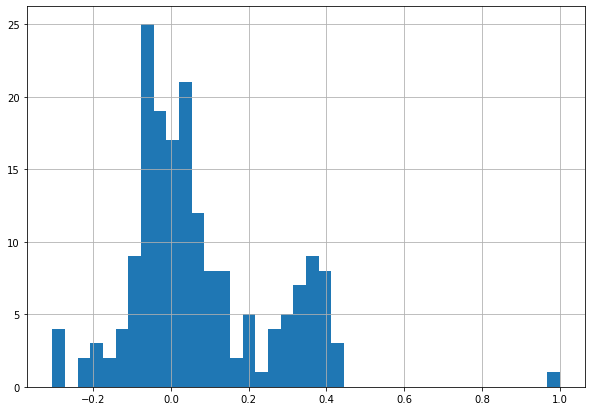

In [17]:
# plotting a histogram of the correlation values for the label
corr_mtx['-logKd/Ki'].hist(bins=40, figsize=(10, 7))

Above we can see that most of the descriptors have a very weak correlation (close to 0) to the `-logKi/Kd` label, but there is also a smaller signifiant peak close to 0.4.

Normally the descriptors with the weakest correlation could be removed  to reduce noise in the training data, but this was not done in the project.

Below are the top 20 best correlating values (top 10 directly correlating and top 10 inversly correlating)

In [18]:
# the top 10 descriptors with direct correlation - 
# not including the binding affinity itself
corr_mtx['-logKd/Ki'].sort_values()[-11:]

nBondsKD      0.391681
nHeavyAtom    0.394171
nBonds        0.396898
Vabc          0.397992
BertzCT       0.399780
nBondsO       0.403438
VMcGowan      0.406675
apol          0.412899
SMR           0.432144
nC            0.442121
-logKd/Ki     1.000000
Name: -logKd/Ki, dtype: float64

In [19]:
# the top 10 descriptors with inverse correlation 
corr_mtx['-logKd/Ki'].sort_values()[:10]

BalabanJ   -0.305557
RPCG       -0.299596
RNCG       -0.291788
RPSA       -0.277036
%A         -0.214031
PNSA2      -0.211821
Lipinski   -0.191329
DPSA1      -0.190266
FNSA2      -0.180488
nAcid      -0.165958
Name: -logKd/Ki, dtype: float64

A more detailed description of most descriptors can be found in the `descriptions.pdf` document

### Splitting the data

The dataset is likely biased considering the number of proteins and ligands that are represented in the dataset. For this reason a form of stratified split was attempted.

Some of the proteins will appear multiple times in the dataset, only with different ligands bound to them. This could lead to a bias of the model to better predicting affinity values for those proteins, but it in general if there are multiple instances of the same protein with different drugs bound to it it means that it is likely an enzyme or another protein that is able to bind to many drugs, and also that it is intensly studied. So the bias could match the bias of the real world where some proteins will be presented more frequently.

Below we plot a histogram of the number of times a protein name appears in the data:

(y axis represents the number of proteins with x instances in the data)

In [20]:
# inporting the names of the proteins
prot_names = pd.read_csv("C:\\Users\\Ieremita Emanuel\\Desktop\\CS_project\\CSVs\\sequence_names.csv").loc[:, ['ID', 'name']]

We convert all the protein names to uppercase to make the names case insensitive, and the results assume that the proteins that are the same have all the same name without variations.

In [21]:
def upper(i):
    '''function to convert value to uppercase'''
    return i.upper()

upper_prot = pd.concat([prot_names['ID'], prot_names['name'].apply(upper)], axis=1)

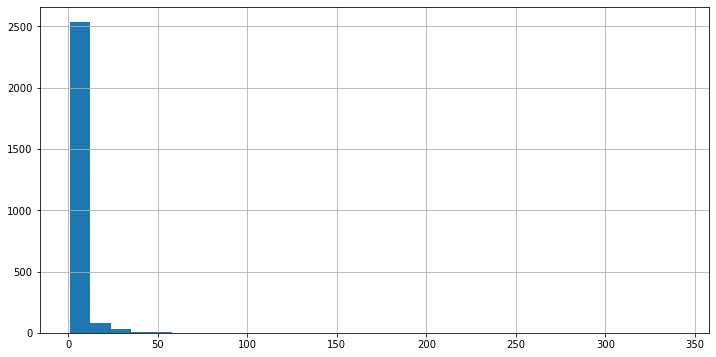

In [22]:
upper_prot['name'].value_counts().hist(bins=30, figsize=(12, 6))

In [23]:
upper_prot['name'].value_counts().describe()

count    2668.000000
mean        3.600825
std        10.179305
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       341.000000
Name: name, dtype: float64

There are 2668 unique proteins in the data, and we can see that 75% of the proteins appear less than three times, and the number of proteins with multiple occurrences drastically decreases afterwards, but with some proteins reaching almost 350 instances, so they are definitely overrepresented.

The model might not be able to generalise well from just single instances of proteins but this tends to be the nature of this data, so it needs to be seen what performance it will result in.

Below we can compare the above graph to the number of occurrences of ligands

In [24]:
# inporting the ligand names
ligand_names = pd.read_csv("C:\\Users\\Ieremita Emanuel\\Desktop\\CS_project\\CSVs\\ligands_and_id.csv").loc[:, 'ligand_name']

The ligands are already uppercase and have more consistent naming

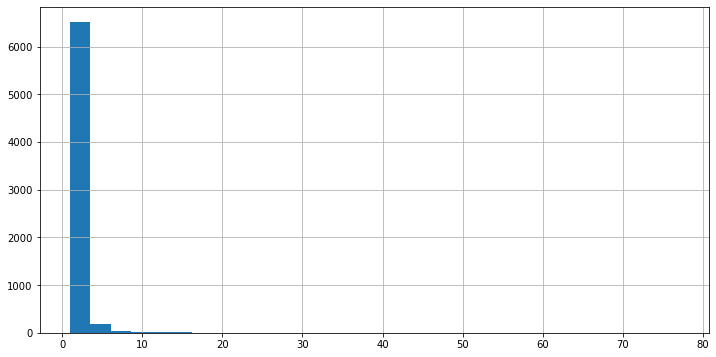

In [25]:
ligand_names.value_counts().hist(bins=30, figsize=(12, 6))

In [28]:
ligand_names.value_counts().describe()

count    6778.000000
mean        1.417380
std         2.116576
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        77.000000
Name: ligand_name, dtype: float64

We notice a similar pattern, only that there are more unique molecules, which is expected, and the most common ligand appears only 77 times (compared to 319 for proteins).

#### Stratified split
To preserve the proportions in the distribution of the proteins, we will attempt a strfified split, where we'll make a series of bins to represent the frequency of occurrence.

The choice of ranges for the bins was somewhat arbitrary in the original methodology, and it just tried to main a comparable number of proteins in each bin.

First we check how many unique proteins are in the ranges of the bins, which are:
* 1-2
* 2-7
* 7-20
* 20-50
* 50-400

In [29]:
# making a dictionary that has occurrence counts for all the proteins, 
# in the form of {protein_name: occurrences}
upr_prot_name_counts = upper_prot['name'].value_counts().to_dict()

count_in_bins = {'1-2': [], '2-7': [], '7-20': [], '20-50': [], '50-400': []}

for name in upr_prot_name_counts.keys():
    curr_name = upr_prot_name_counts[name]
    if curr_name<=2:
        count_in_bins['1-2'].append(name)
    elif curr_name>2 and curr_name<=7:
        count_in_bins['2-7'].append(name)
    elif curr_name>7 and curr_name<=20:
        count_in_bins['7-20'].append(name)
    elif curr_name>20 and curr_name<=50:
        count_in_bins['20-50'].append(name)
    elif curr_name>50 and curr_name<=400:
        count_in_bins['50-400'].append(name)

In [30]:
print('\n{:<13} {:<13}\n'.format('Occurrences', 'Unique proteins'))
for key in count_in_bins.keys():
    print('{:<13} {:<13}'.format(key, len(count_in_bins[key])))


Occurrences   Unique proteins

1-2           1875         
2-7           534          
7-20          197          
20-50         51           
50-400        11           


From the output above we can see how many unique protein names have occurrences within those ranges.

We can also check now how many actual entries are within those ranges.

In [31]:
tot_occr = {'1-2': [], '2-7': [], '7-20': [], '20-50': [], '50-400': []}

for idx in upper_prot.index:
    
    # name of protein  in current iteration 
    curr_name = upper_prot.loc[idx, 'name']
    
    # check if the protein name is in a specific bin in 
    # the dictionary with counts
    for key in tot_occr.keys():
            if curr_name in count_in_bins[key]:
                # adding the entry ID to the bins
                tot_occr[key].append(upper_prot.loc[idx, 'ID'])

In [32]:
print('\n{:<13} {:<13}\n'.format('Occurrences', 'Entries'))
for key in tot_occr.keys():
    print('{:<13} {:<13}'.format(key, len(tot_occr[key])))


Occurrences   Entries      

1-2           2303         
2-7           2201         
7-20          2270         
20-50         1578         
50-400        1255         


The numbers of occurrences across the bins are comparable, and we can now pick 15% of the entries from each bin, and have a resulting test set that is 15% of the whole dataset, wile also having preserved proportions so for example the proteins with a very high occurrence are not overrepresented in either one of the training or testing sets.

In [33]:
import random as rnd

test_ids = []
for bins in tot_occr.keys():
    tmp = rnd.sample(tot_occr[bins], int(round((15*len(tot_occr[bins])/100))))
    for i in tmp:
        test_ids.append(i)

In [34]:
len(test_ids)

1440

#### Making the train and test sets 

In [35]:
# shuffling the rows in the dataframe
full = full.sample(frac=1)

# making the train and test sets
train = full.loc[full.index.isin(test_ids)==False]
test = full.loc[full.index.isin(test_ids)]

# the train and test labels
train_label = train['-logKd/Ki'].copy()
test_label = test['-logKd/Ki'].copy()

In [36]:
# dropping the labels from the test and train dataframes
train = train.drop('-logKd/Ki', axis=1)
test = test.drop('-logKd/Ki', axis=1)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8167 entries, 5u49 to 6jay
Columns: 178 entries, prot_MW to WPol
dtypes: float64(178)
memory usage: 11.2+ MB


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, 4gkm to 5oei
Columns: 178 entries, prot_MW to WPol
dtypes: float64(178)
memory usage: 2.0+ MB


The data is now ready for training the models

## Training models

Note that the values will be slightly different from the ones reported in the project report, since the models were retrained

This section is missing the parameter exploration for the models, but the results and the parameters searched are in the project report. The code that was used to explore the parameters was essentially the following, with adaptations made for every model (for example the contents of `param_grid`):

In [39]:
from sklearn.model_selection import GridSearchCV

# dictionary with parameters to be explored
param_grid = [{"n_estimators": [200, 300, 400, 500], 
               "max_features": ['sqrt', 'log', None, 20, 30, 40]}]

grid_search = GridSearchCV(r_forest, param_grid, 
                           scoring='r2', cv=2, 
                           return_train_score=True)

grid_search.fit(train, train_label)

# printing the best parameters
print('Best estimators: {}\nBest score: {}'.format(grid_search.best_estimator_, 
                                                   grid_search.best_score_))

The following function was also used to generate graphs with the performance of the different parameters:

(Most of the code for the function was taken from the following answer on StackOverflow: https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv)

In [40]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2, name=''):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1, figsize=(12, 8))

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title(name+" Grid Search Scores", fontsize=22, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=18)
    ax.set_ylabel('CV Average Score', fontsize=18)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

Running the function for the decision tree model would result in the following output:

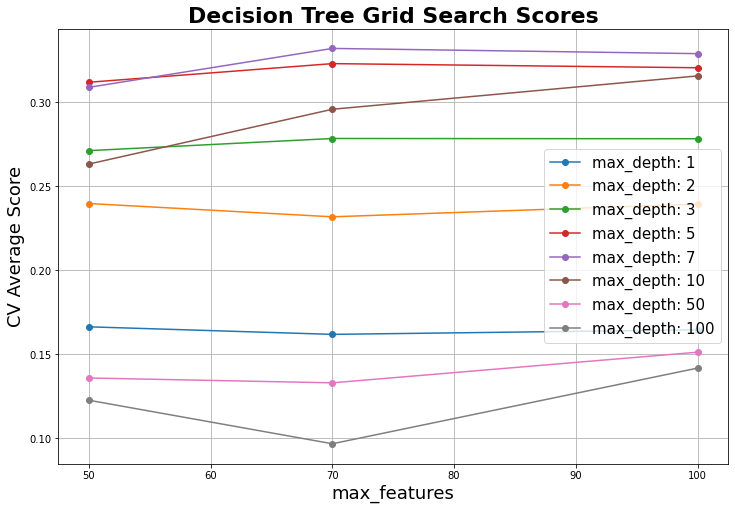

In [41]:
# parameter grid
dec_param_grid = [{"max_features": [50, 70, 100], 
                   'max_depth': [1, 2, 3, 5, 7, 10, 50, 100]}]

# running the grid search
dec_grid = grid(dec_tree, dec_param_grid, 5, train, train_label)

# plotting the results
plot_grid_search(dec_grid.cv_results_, 
                 dec_param_grid[0]['max_features'], 
                 dec_param_grid[0]['max_depth'] , 
                 'max_features', 'max_depth', 'Decision Tree')

### Linear regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

# making an instance and training the model
lin_reg = LinearRegression()
lin_reg.fit(train, train_label)

LinearRegression()

#### RMSE

In [43]:
# predicting the values for the test set
lin_reg_pred = lin_reg.predict(test)

In [44]:
# getting the root mean squared error (RMSE) for the test set
def print_rmse(pred, label, model=''):
    rmse = np.sqrt(mean_squared_error(label, pred))
    print('{} RMSE: {}'.format(model, rmse))

print_rmse(lin_reg_pred, test_label, 'Linear regression')

Linear regression RMSE: 1.6052311276165196


In [45]:
# getting the RMSE for the train set
lr_train_pred = lin_reg.predict(train)
print_rmse(lr_train_pred, train_label, 'Linear regression')

Linear regression RMSE: 1.5775221508755988


#### Cross validation

In [46]:
def display_cv_scores(model, title=''):
    '''displays the cross validation scores along with 
    their minimum, maximum, average values and their standard deviation'''
    
    model_cv = cross_val_score(model, train, train_label,
                               scoring="neg_mean_squared_error", 
                               cv=10)
    scores = np.sqrt(-model_cv)
    print('\n{} cross validation RMSE\n'.format(title))
    print('Scores:\n {}\n'.format(scores))
    print("{:<10} {:<10}".format('Max score: ', max(scores)))
    print("{:<10} {:<10}".format('Min score: ', min(scores)))
    print("{:<11} {:<11}".format('Mean: ', scores.mean()))
    print("{:<11} {:<11}".format('St Dev: ', scores.std()))

display_cv_scores(lin_reg, 'Linear regression')


Linear regression cross validation RMSE

Scores:
 [1.59852623 1.61213102 1.65416292 1.5777453  1.67482415 1.56404935
 1.66472753 1.62546339 1.62378213 1.58506158]

Max score:  1.6748241465575568
Min score:  1.564049347060155
Mean:       1.618047358855738
St Dev:     0.035831608213204635


#### Plot

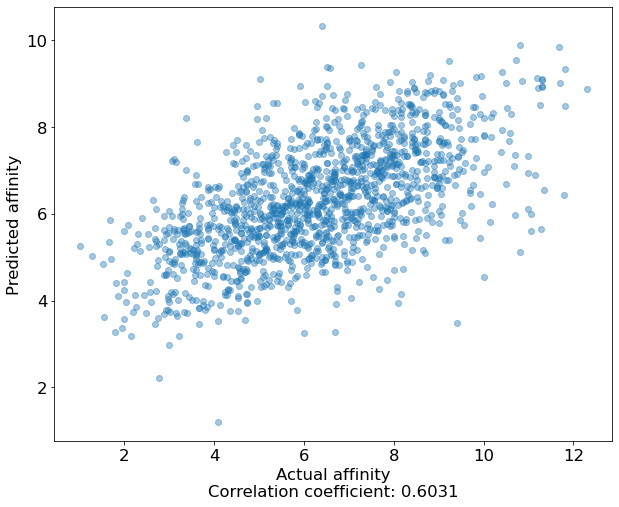

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

def make_plot(model):
    '''makes a plot of the predicted versus actual affinity values in the test set for a 
    specific model'''
    
    model_pred = model.predict(test)
    plt.rcParams["figure.figsize"]=10,8
    plt.rcParams['font.size']=16.5
    plt.scatter(test_label, model_pred, alpha=0.4)
    plt.xlabel('Actual affinity\nCorrelation coefficient: {}'.format(round(np.corrcoef(test_label, model_pred)[0][1], 4)))
    plt.ylabel('Predicted affinity')
    plt.show()
make_plot(lin_reg)

### Ramdom forest

In [48]:
from sklearn.ensemble import RandomForestRegressor

r_forest = RandomForestRegressor()
r_forest.fit(train, train_label)

RandomForestRegressor()

#### RMSE

In [49]:
rf_pred = r_forest.predict(test)
print_rmse(rf_pred, test_label, 'Ramdom forest')

Ramdom forest RMSE: 1.3213434875235257


#### Cross validation

In [50]:
display_cv_scores(r_forest, 'Random forest')


Ramdom forest cross validation RMSE

Scores:
 [1.27320454 1.26205172 1.30360445 1.24046749 1.32715081 1.20868628
 1.30436543 1.27520302 1.22977358 1.29309484]

Max score:  1.3271508126749738
Min score:  1.2086862846800082
Mean:       1.2717602164051143
St Dev:     0.035254881600331134


#### Plot

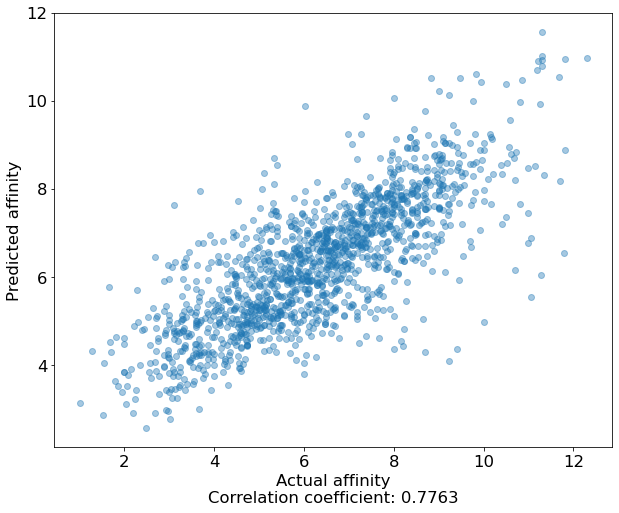

In [51]:
make_plot(r_forest)

### Decision tree

#### RMSE

In [52]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor()
dec_tree.fit(train, train_label)

# printing RMSE for the test set
dt_pred = dec_tree.predict(test)
print_rmse(dt_pred, test_label, 'Decision tree')

Decision tree RMSE: 1.8109527112054093


In [53]:
# RMSE for train set
train_dt_pred = dec_tree.predict(train)
print_rmse(train_dt_pred, train_label, 'Decision tree')

Decision tree RMSE: 4.889410948149578e-17


#### Cross validation

In [54]:
display_cv_scores(dec_tree, 'Decision tree')


Decision tree cross validation RMSE

Scores:
 [1.87002481 1.75995163 1.87674707 1.81235614 1.86817097 1.79430385
 1.88796057 1.76104296 1.74154386 1.7951435 ]

Max score:  1.88796056739519
Min score:  1.741543855319182
Mean:       1.8167245353837427
St Dev:     0.05208471750794288


#### Plot

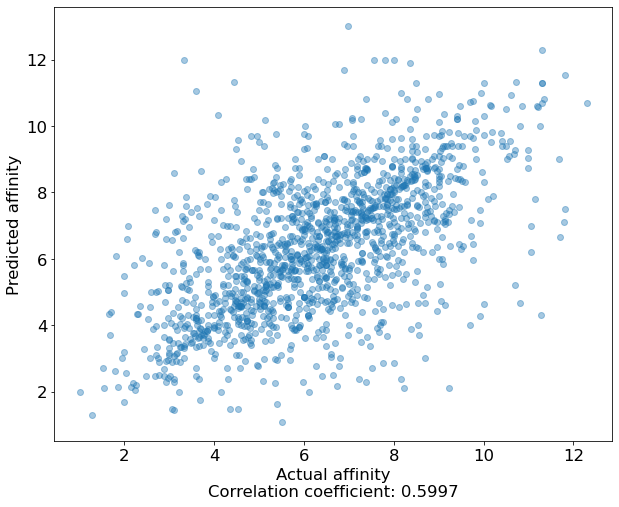

In [55]:
make_plot(dec_tree)

### SVM (Support Vector Machine)

In [56]:
from sklearn.svm import SVR

# support vector regressor
svr = SVR()
svr.fit(train, train_label)

SVR()

#### RMSE

In [57]:
svr_pred = svr.predict(test)
print_rmse(svr_pred, test_label, 'SVM')

SVM RMSE: 1.9490472240415584


In [58]:
# RMSE for train set
train_svr_pred = svr.predict(train)
print_rmse(train_svr_pred, train_label, 'SVM')

SVM RMSE: 1.898237983788422


#### Cross validation

In [59]:
# Cross validation
display_cv_scores(svr, 'SVM')


SVM cross validation RMSE

Scores:
 [1.93349671 1.85642439 1.89221631 1.84262764 2.01039105 1.89011474
 1.94589982 1.9089102  1.89009678 1.90506697]

Max score:  2.0103910479558595
Min score:  1.8426276417604392
Mean:       1.907524461346372
St Dev:     0.04516713008141325


#### Plot

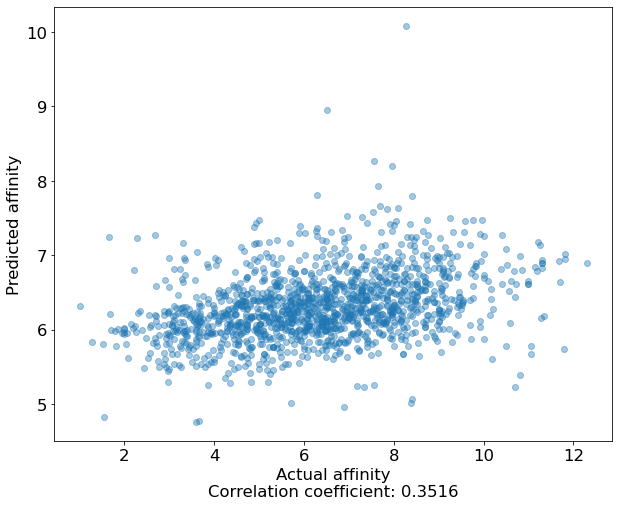

In [60]:
make_plot(svr)

#### SVR with 'poly' kernel

In [61]:
svr_poly = SVR(kernel="poly")
svr_poly.fit(train, train_label)

svr_poly_pred = svr_poly.predict(test)
print_rmse(svr_poly_pred, test_label, 'SVR poly')

SVR poly RMSE: 2.071155309741362


### MLP (Multi-layer perceptron)

In [62]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(hidden_layer_sizes=(180,150,100,30), 
                    batch_size=10, 
                    learning_rate='adaptive', 
                    max_iter=1700, 
                    random_state=42)

mlpr.fit(train, train_label)

MLPRegressor(batch_size=10, hidden_layer_sizes=(180, 150, 100, 30),
             learning_rate='adaptive', max_iter=1700, random_state=42)

#### RMSE

In [63]:
mlpr_pred = mlpr.predict(test)
print_rmse(mlpr_pred, test_label, 'MLP regressor')

MLP regressor RMSE: 2.0119005109223114


#### Cross validation

In [64]:
display_cv_scores(mlpr, 'MLP')


MLP cross validation RMSE

Scores:
 [1.9792708  2.02091659 1.98157177 2.05387002 2.09813475 1.99260319
 2.08024777 2.0052818  2.08214494 2.00423537]

Max score:  2.098134746284333
Min score:  1.9792707965483454
Mean:       2.029827699432866
St Dev:     0.04257973535271341


#### Plot

C:\Users\Ieremita Emanuel\Desktop\miniconda3\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Ieremita Emanuel\Desktop\miniconda3\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


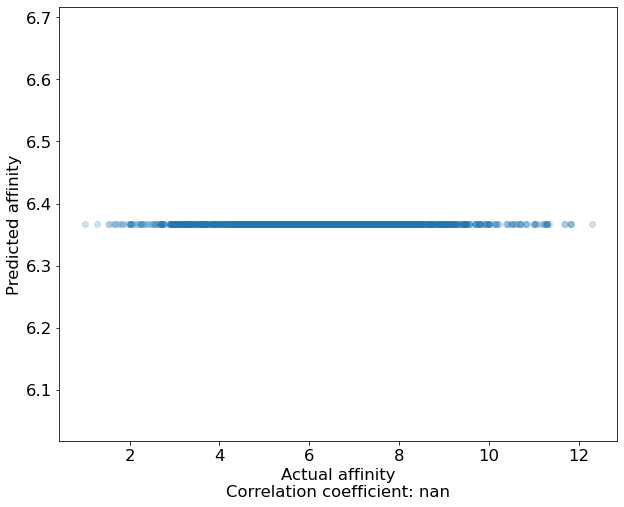

In [65]:
make_plot(mlpr)

In [66]:
len(mlpr_pred)

1440

In [67]:
print('min: {}\nmax: {}\nmean: {}'.format(min(mlpr_pred), max(mlpr_pred), sum(mlpr_pred)/len(mlpr_pred)))

min: 6.367102107227869
max: 6.367102107227869
mean: 6.367102107227778


Something clearly went wrong and the predictions are all the same